# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

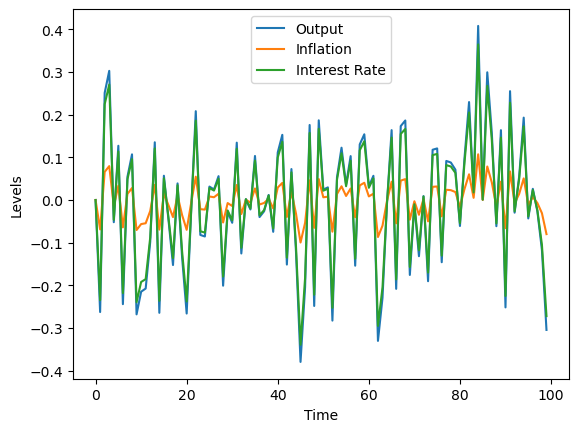

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set model parameters
alpha = 0.5         # Phillips curve parameter
beta = 0.95         # Discount factor
theta = 2.0         # Phillips curve parameter
psi_pi = 1.5        # Monetary policy parameter on inflation
psi_y = 0.5         # Monetary policy parameter on output
rho_y = 0.8         # Persistence of output shock
rho_pi = 0.5        # Persistence of inflation shock
sigma_y = 0.1       # Standard deviation of output shock
sigma_pi = 0.1      # Standard deviation of inflation shock
phi = 0.5           # Output gap parameter

# Set simulation parameters
T = 100             # Number of time periods
np.random.seed(0)

# Create empty arrays to store simulated variables
y = np.zeros(T)
pi = np.zeros(T)
r = np.zeros(T)

# Generate shocks series
epsilon_y = np.random.normal(0, sigma_y, T)
epsilon_pi = np.random.normal(0, sigma_pi, T)

# Initial values
y[0] = 0.0
pi[0] = 0.0
r[0] = 0.0

# Simulate the model
for t in range(1, T):
    # Compute variables
    y[t] = (1 / (1 + theta * psi_y)) * (epsilon_y[t] - theta * psi_pi * epsilon_pi[t-1])   # Output
    pi[t] = (alpha / (1 - alpha)) * (1 - (1 - alpha) * beta) * (phi * y[t])               # Inflation
    r[t] = psi_pi * pi[t] + psi_y * y[t]                                                  # Interest rate

# Plot the simulated series
time_periods = np.arange(T)
plt.plot(time_periods, y, label='Output')
plt.plot(time_periods, pi, label='Inflation')
plt.plot(time_periods, r, label='Interest Rate')
plt.xlabel('Time')
plt.ylabel('Levels')
plt.legend()
plt.show()



In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set model parameters
alpha = 0.5         # Phillips curve parameter
beta = 0.95         # Discount factor
theta = 2.0         # Phillips curve parameter
psi_pi = 1.5        # Monetary policy parameter on inflation
psi_y = 0.5         # Monetary policy parameter on output
rho_y = 0.8         # Persistence of output shock
rho_pi = 0.5        # Persistence of inflation shock
sigma_y = 0.1       # Standard deviation of output shock
sigma_pi = 0.1      # Standard deviation of inflation shock

# Set simulation parameters
T = 100             # Number of time periods
np.random.seed(0)

# Create empty arrays to store simulated variables
y = np.zeros(T)
pi = np.zeros(T)
r = np.zeros(T)

# Generate shocks series
epsilon_y = np.random.normal(0, sigma_y, T)
epsilon_pi = np.random.normal(0, sigma_pi, T)

# Initial values
y[0] = 0.0
pi[0] = 0.0
r[0] = 0.0

# Simulate the model
for t in range(1, T):
    if t == 1:
        phi = epsilon_y[0] / (alpha * (1 - (1 - alpha) * beta))
    y[t] = (1 / (1 + theta * psi_y)) * (epsilon_y[t] - theta * psi_pi * epsilon_pi[t-1])   # Output
    pi[t] = (alpha / (1 - alpha)) * (1 - (1 - alpha) * beta) * (phi * y[t])               # Inflation
    r[t] = psi_pi * pi[t] + psi_y * y[t]                                                  # Interest rate

# Plot the simulated series
time_periods = np.arange(T)
plt.plot(time_periods, y, label='Output')
plt.plot(time_periods, pi, label='Inflation')
plt.plot(time_periods, r, label='Interest Rate')
plt.xlabel('Time')
plt.ylabel('Levels')
plt.legend()
plt.show()


TypeError: 'float' object is not subscriptable

# Model description

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 